# Hierarchical Clustering (階層式分群)

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 生成26個sample data
Generate 26 samples

In [2]:
# For reproducibility
np.random.seed(1000)

nb_samples = 26

## 畫出分群後的點
Draw points after Clustering

In [3]:
def plot_clustered_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    markers = ['o', 'd', '^', 'x', '1', '2', '3', 's']
    colors = ['r', 'b', 'g', 'c', 'm', 'k', 'y', '#cccfff']

    for i in range(nb_samples):
        ax.scatter(X[i, 0], X[i, 1], marker=markers[Y[i]], color=colors[Y[i]])

    plt.show()

## \begin{align}\odot使用歐式距離計算出資料兩兩間的相異度矩陣(dissimilarity matrix)\end{align}
Using the Euclidean distance to calculate the dissimilarity matrix between the two data sets

\begin{align}
X =\{\bar{x_{1}}, \bar{x_{2}},\dots\ ,\bar{x_{n}}\} , \bar{x_{i}} \in \mathbb{R}^m
\end{align}

\begin{align}
d_{Euclidean}(\bar{x_{1}},\bar{x_{2}})= \| \bar{x_{1}}-\bar{x_{2}}\|_2
\end{align}
## \begin{align}\odot使用完整連結聚合演算法計算群與群之間的距離\end{align}

complete-linkage agglomerative algorithm:
\begin{align}
d(C_{i},C_{j})=\max_{a\in C_{i},b\in C_{j}}d(a,b)
\end{align}

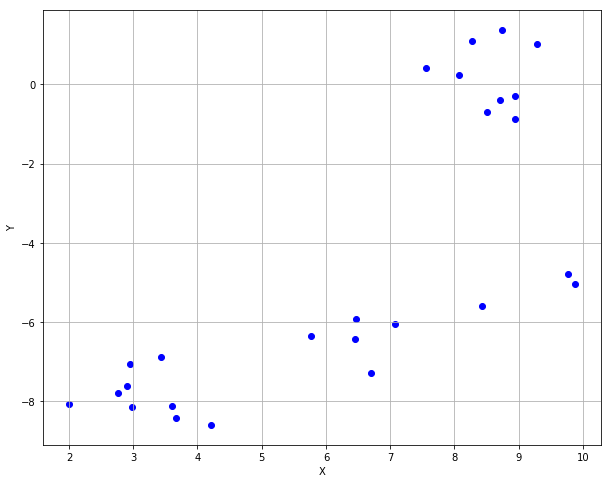

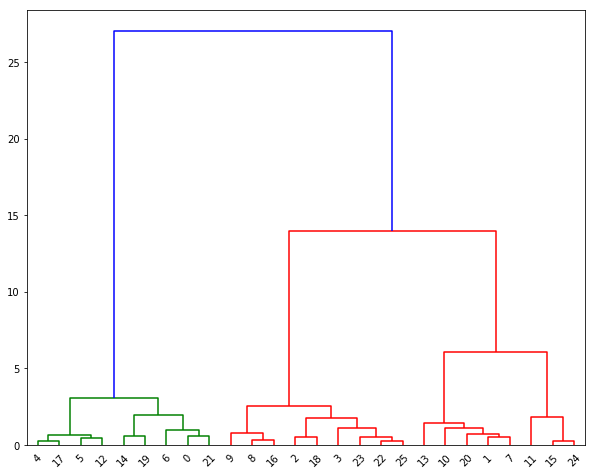

Complete linkage


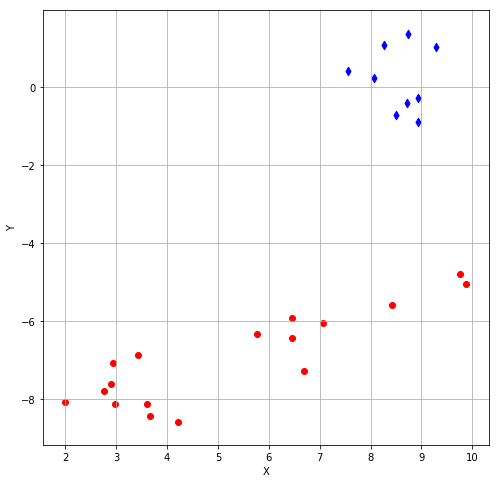

Cluster labels:[1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0]
8.26501041988533 1.0839030598145523
6.462261571648987 -5.913595383160207
3.4382645995995613 -6.87241235222788
1.9953288588426399 -8.065225282735936
8.943304117947148 -0.2812834285105632
8.51050080845502 -0.7010046412359039
9.286563496040218 1.0236729873821055
6.4494442032060935 -6.4211515571533875
3.6723448855814054 -8.425365186910081
4.216407458058909 -8.58793373342951
5.76996964788032 -6.335805615448391
8.42350743028247 -5.594343097541449
8.934864183828884 -0.880031121748548
6.69769529412744 -7.278844865511093
7.549473274475449 0.42436276410994134
9.766773978005101 -4.7874543900836395
3.607323661161092 -8.118061911087691
8.711425079321739 -0.3973894406465939
2.947211919565004 -7.064738000048797
8.069263910282352 0.2292073110062387
7.068907273785225 -6.0507068743039
8.731643231453294 1.3745371459199704
2.9076521029568125 -7.606987532880401
2.9750981377703836 -8.131845905336576
9.87917197427349 -5.0315243189757215
2.7

In [4]:
if __name__ == '__main__':
   # 建立高斯分佈資料集斑點
    X, Y = make_blobs(n_samples=nb_samples, n_features=2,
                      centers=3, cluster_std=0.9)##2個特徵,3個中心點

    # 顯示資料
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.scatter(X[:, 0], X[:, 1], marker='o', color='b')
    plt.show()

    # 計算距離矩陣
    Xdist = pdist(X, metric='euclidean')

    # 計算連接
    Xl = linkage(Xdist, method='ward')

    # 計算和顯示樹狀圖形
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    Xd = dendrogram(Xl)
    plt.show()
    
        # 完成聚合連接
    print('Complete linkage')
    ac = AgglomerativeClustering(n_clusters=2, linkage='complete')
    Y = ac.fit_predict(X)

    # 顯示群聚資料集
    plot_clustered_dataset(X, Y)
    print('Cluster labels:%s' % Y)
    for i in range(len(X[:,0])):
        print(X[i,0],X[i,1])